In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
path = '../PostBornEma/'
sys.path.append("../scripts/") 
from lab import *

In [33]:
##general settings
LSST      = False
#if not LSST redhsift kernel
z0        = 0.7
sigma_z   = 0.1
bin_num   = 'all'
bias      = 'simple'
z_source  = 1.#z_cmb
zmax      = 2#z_source
chimax    = chi_z(zmax)
s         = 0.6
print('zmax=%d'%zmax, 'chimax=%d'%chimax)
chi_source = chi_z(z_source)

if LSST:
    if chi_source==chi_cmb:
        file_ext = 'lsst%s_cmblens'%str(bin_num)
    else:
        file_ext = 'lsst%s_deltalens_z%d'%(str(bin_num),z_source*10)

else:
    if chi_source==chi_cmb:
        file_ext = 'gaussgal_z%d_sigma%d_cmblens'%(z0*10,sigma_z*10)
    else:
        file_ext = 'gaussgal_z%d_sigma%d_deltalens_z%d'%(z0*10,sigma_z*10,z_source*10) 
    
file_ext+=bias+'_bias'
    
file_ext2 = 'zmax%d'%zmax
    
print(file_ext, file_ext2)


if bias == 'simple':
    bias_func = simple_bias
elif bias =='constant':
    bias_func = constant_bias
else:
    print('no valid bias function selected')



params = {}
params['LSST'] = LSST
params['z0'] = z0
params['sigma_z'] = sigma_z
params['bin_num'] = bin_num
params['chimax'] = chimax
params['chisource'] = chi_source
params['zsource'] = z_source
params['ext'] = file_ext
params['ext2']= file_ext2
params['s'] = s
params['bias']=bias

try: 
    params_ = pickle.load(open('../settings/params_%s.pkl'%file_ext,'rb'))
    assert(params==params_)
except:
    pickle.dump(params,open('../settings/params_%s.pkl'%file_ext,'wb'))



zmax=2 chimax=3597
gaussgal_z7_sigma1_deltalens_z10simple_bias zmax2


In [34]:
print('delta lensing with chimax %d'%chimax)
def lensing_kernel(xi):
    xmax = chi_source
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
    
if LSST:
    if bin_num == 'all':
        def galax_kernel(x):
            return lsst_kernel_cb(x)*simple_bias(x)
    else:
        def galax_kernel(x):
            return lsst_kernel_cbn[bin_num](x)*simple_bias(x)
else:
    kernel = gal_clus(Gauss_redshift(sigma_z=sigma_z,z0=z0), bias_func)
    def galax_kernel(x):
        return kernel(x)
    
print(galax_kernel(chimax))

delta lensing with chimax 3597
2.4073897284855802e-39


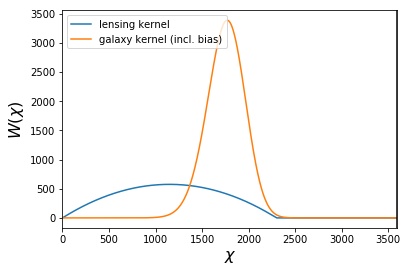

In [35]:
#see if kernels are sensible
chis = np.linspace(1,chimax,20000)
plt.plot(chis, lensing_kernel(chis)*chis**2,label='lensing kernel')
plt.plot(chis, galax_kernel(chis)*1e6, label='galaxy kernel (incl. bias)')
#plt.plot(chis, lsst_kernel_cbn[1](chis)*1e6)
plt.axvline(x=chimax,color='black')
#plt.plot(chis, test(chis)*5e6, ls='--')
plt.xlabel('$\chi$',fontsize=16)
plt.ylabel('$W(\chi)$',fontsize=16)
#plt.legend(loc=(1.01,0.8), fontsize=12)
plt.legend(loc='upper left')
plt.xlim(0,chimax)
plt.savefig('../plots/redshiftkernels_%s.pdf'%file_ext, bbox_inches='tight')